In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()

In [2]:
DDoS=pd.read_csv('/content/dataset_sdn.csv')

In [3]:
DDoS.Protocol.unique()
DDoS['Protocol'] = DDoS['Protocol'].replace('TCP', '0')
DDoS['Protocol'] = DDoS['Protocol'].replace('UDP', '1')
DDoS['Protocol'] = DDoS['Protocol'].replace('ICMP', '2')
DDoS.Protocol.unique()

array(['1', '0', '2'], dtype=object)

In [4]:
DDoS['src'] = DDoS['src'].replace('10.0.0.0', '0')
DDoS['src'] = DDoS['src'].replace('10.0.0.2', '1')
DDoS['src'] = DDoS['src'].replace('10.0.0.4', '2')
DDoS['src'] = DDoS['src'].replace('10.0.0.10', '3')
DDoS['src'] = DDoS['src'].replace('10.0.0.5', '4')
DDoS['src'] = DDoS['src'].replace('10.0.0.13', '5')
DDoS['src'] = DDoS['src'].replace('10.0.0.6', '6')
DDoS['src'] = DDoS['src'].replace('10.0.0.11', '7')
DDoS['src'] = DDoS['src'].replace('10.0.0.20', '8')
DDoS['src'] = DDoS['src'].replace('10.0.0.18', '9')
DDoS['src'] = DDoS['src'].replace('10.0.0.12', '10')
DDoS['src'] = DDoS['src'].replace('10.0.0.14', '11')
DDoS['src'] = DDoS['src'].replace('10.0.0.15', '12')
DDoS['src'] = DDoS['src'].replace('10.0.0.16', '13')
DDoS['src'] = DDoS['src'].replace('10.0.0.17', '14')
DDoS['src'] = DDoS['src'].replace('10.0.0.1', '15')
DDoS['src'] = DDoS['src'].replace('10.0.0.3', '16')
DDoS['src'] = DDoS['src'].replace('10.0.0.8', '17')
DDoS['src'] = DDoS['src'].replace('10.0.0.7', '18')
DDoS['src'] = DDoS['src'].replace('10.0.0.9', '19')
DDoS.src.unique()

array(['15', '1', '2', '3', '16', '4', '5', '6', '8', '7', '10', '9',
       '17', '18', '19', '11', '12', '13', '14'], dtype=object)

In [5]:
DDoS['dst'] = DDoS['dst'].replace('10.0.0.8', '0')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.7', '1')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.2', '2')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.4', '3')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.6', '4')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.10', '5')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.3', '6')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.6', '7')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.5', '8')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.9', '9')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.12', '10')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.13', '11')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.14', '12')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.11', '13')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.16', '14')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.1', '15')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.15', '16')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.17', '17')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.18', '18')
DDoS.dst.unique()

array(['0', '1', '6', '8', '5', '11', '15', '13', '2', '3', '9', '4',
       '12', '16', '10', '14', '17', '18'], dtype=object)

In [6]:
DDoS["rx_kbps"] = DDoS["rx_kbps"].fillna(DDoS["rx_kbps"].mean())

In [7]:
DDoS["tot_kbps"] = DDoS["tot_kbps"].fillna(DDoS["tot_kbps"].mean())

In [8]:
DDoS['label'].value_counts()

0    63561
1    40784
Name: label, dtype: int64

In [9]:
DDoS.groupby(["dt","src"]).count()

switch  dst  pktcount  bytecount  dur  dur_nsec  tot_dur  flows  \
dt    src                                                                    
2488  15       54   54        54         54   54        54       54     54   
2518  15       56   56        56         56   56        56       56     56   
      7       168  168       168        168  168       168      168    168   
2548  1        56   56        56         56   56        56       56     56   
      15       56   56        56         56   56        56       56     56   
...           ...  ...       ...        ...  ...       ...      ...    ...   
42905 17        8    8         8          8    8         8        8      8   
      18        8    8         8          8    8         8        8      8   
      4        16   16        16         16   16        16       16     16   
42935 17        8    8         8          8    8         8        8      8   
      4         8    8         8          8    8         8        8      8   

           packetins  pktperflow  ...  pktrate  Pairflow  Protocol  port_no  \
dt    src                         ...                                         
2488  15          54          54  ...       54        54        54       54   
2518  15          56          56  ...       56        56        56       56   
      7          168         168  ...      168       168       168      168   
2548  1           56          56  ...       56        56        56       56   
      15          56          56  ...       56        56        56       56   
...              ...         ...  ...      ...       ...       ...      ...   
42905 17           8           8  ...        8         8         8        8   
      18           8           8  ...        8         8         8        8   
      4           16          16  ...       16        16        16       16   
42935 17           8           8  ...        8         8         8        8   
      4            8           8  ...        8         8         8        8   

           tx_bytes  rx_bytes  tx_kbps  rx_kbps  tot_kbps  label  
dt    src                                                         
2488  15         54        54       54       54        54     54  
2518  15         56        56       56       56        56     56  
      7         168       168      168      168       168    168  
2548  1          56        56       56       56        56     56  
      15         56        56       56       56        56     56  
...             ...       ...      ...      ...       ...    ...  
42905 17          8         8        8        8         8      8  
      18          8         8        8        8         8      8  
      4          16        16       16       16        16     16  
42935 17          8         8        8        8         8      8  
      4           8         8        8        8         8      8  

[3657 rows x 21 columns]

In [10]:
DDoS.groupby(["dt","src"]).label.count()

dt     src
2488   15      54
2518   15      56
       7      168
2548   1       56
       15      56
             ... 
42905  17       8
       18       8
       4       16
42935  17       8
       4        8
Name: label, Length: 3657, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X = DDoS[['src','dst','dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow','Protocol' ,'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps']]
y = DDoS['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Feature scaling (or standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:

!pip install pytorch-tabnet

In [15]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, accuracy_score


In [16]:
# define the model
clf1_nopreproc = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax' # "sparsemax"
                      )

Device used : cpu


In [19]:
# fit the model 
clf1_nopreproc.fit(
    X_train,y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_name=['train', 'valid'],
    eval_metric=['auc','accuracy'],
    max_epochs=20 , patience=50,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
)        

epoch 0  | loss: 0.08283 | train_auc: 0.99032 | train_accuracy: 0.92342 | valid_auc: 0.99013 | valid_accuracy: 0.9207  |  0:00:12s
epoch 1  | loss: 0.06577 | train_auc: 0.97454 | train_accuracy: 0.8366  | valid_auc: 0.97328 | valid_accuracy: 0.83612 |  0:00:24s
epoch 2  | loss: 0.05351 | train_auc: 0.98183 | train_accuracy: 0.88546 | valid_auc: 0.98089 | valid_accuracy: 0.88073 |  0:00:34s
epoch 3  | loss: 0.05517 | train_auc: 0.98772 | train_accuracy: 0.75494 | valid_auc: 0.98622 | valid_accuracy: 0.75576 |  0:00:47s
epoch 4  | loss: 0.04095 | train_auc: 0.99153 | train_accuracy: 0.87426 | valid_auc: 0.99155 | valid_accuracy: 0.87354 |  0:01:03s
epoch 5  | loss: 0.04234 | train_auc: 0.90158 | train_accuracy: 0.60208 | valid_auc: 0.9008  | valid_accuracy: 0.60578 |  0:01:13s
epoch 6  | loss: 0.03726 | train_auc: 0.99954 | train_accuracy: 0.98934 | valid_auc: 0.99943 | valid_accuracy: 0.98778 |  0:01:28s
epoch 7  | loss: 0.03677 | train_auc: 0.9832  | train_accuracy: 0.8302  | valid_auc

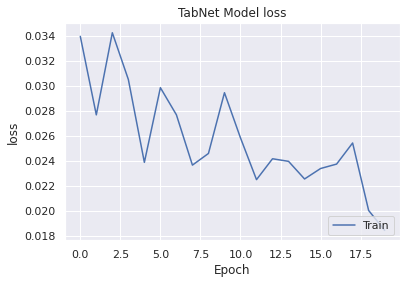

In [32]:
# plot losses
plt.plot(clf1_nopreproc.history['loss'])
plt.title('TabNet Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('TabNet Model loss.png')
plt.show()

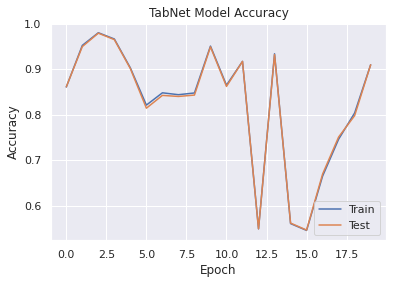

In [28]:
# plot accuracy
plt.plot(clf1_nopreproc.history['train_accuracy'])
plt.plot(clf1_nopreproc.history['valid_accuracy'])
plt.title('TabNet Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('TabNet Model Accuracy.png')
plt.show()

In [29]:
# find and plot feature importance
y_pred = clf1_nopreproc.predict(X_test)

In [30]:
# determine best accuracy for test set
preds = clf1_nopreproc.predict(X_test)
test_acc = accuracy_score(preds, y_test)
print(f"BEST ACCURACY SCORE ON TEST SET : {test_acc}")

BEST ACCURACY SCORE ON TEST SET : 0.9788681776798122
